In [1]:
import os
import re
import requests
import shutil

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
all_dolls_cleaned = pd.read_csv("dolls/all_dolls_data.csv")
all_dolls_cleaned.head()

,Unnamed: 0,Doll_name,Link,Picture_link,Number_of_bids,Minimum_bid,Final_price,Estimated_price_range_min,Estimated_price_range_max
0,0,Multi-Faced Doll By Cark Bergner.,http://auctions.morphyauctions.com/Multi_Faced...,https://auctions.morphyauctions.com/ItemImages...,5.0,300,450.0,600.0,900.0
1,1,"""Belton-Type"" Child Doll.",http://auctions.morphyauctions.com/_Belton_Typ...,https://auctions.morphyauctions.com/ItemImages...,6.0,250,448.0,500.0,800.0
2,2,French Fashion Doll with Unusual Body.,http://auctions.morphyauctions.com/French_Fash...,https://auctions.morphyauctions.com/ItemImages...,11.0,1000,2280.0,2000.0,3000.0
3,3,Lot Of 2: Bisque Shoulder Head French Fashion ...,http://auctions.morphyauctions.com/Lot_Of_2__B...,https://auctions.morphyauctions.com/ItemImages...,4.0,500,768.0,1000.0,1400.0
4,4,'1890''s French Bisque Head Walking Doll.',http://auctions.morphyauctions.com/1890_s_Fren...,https://auctions.morphyauctions.com/ItemImages...,2.0,900,1664.0,1800.0,2500.0


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text yticklabel objects>)

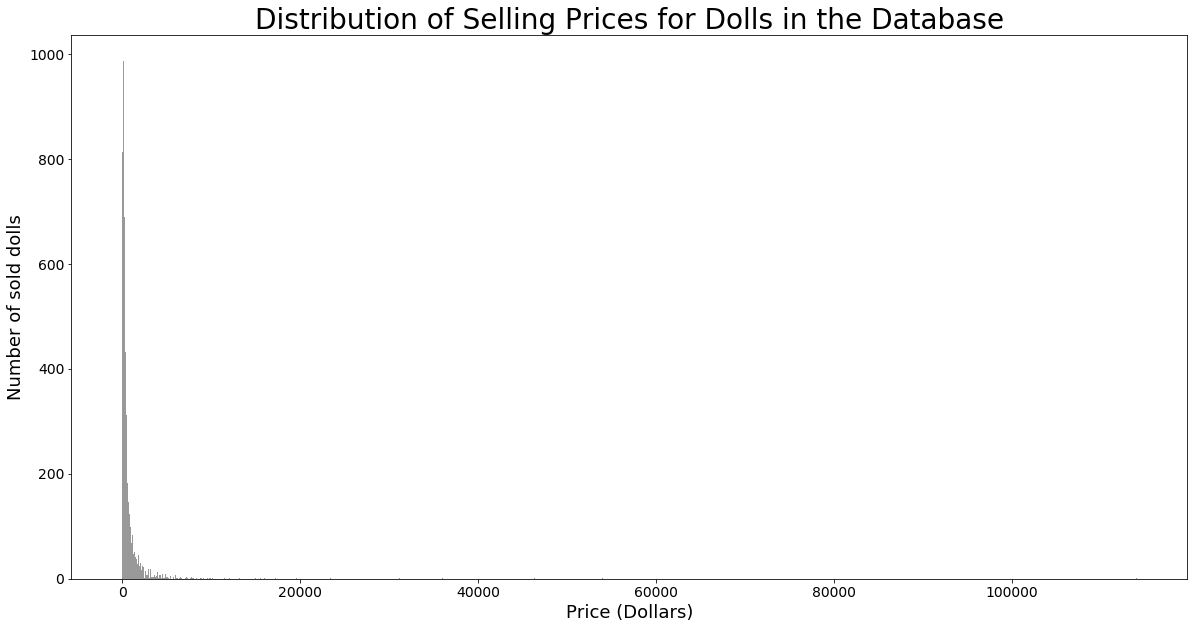

In [5]:
# Lets take a look at the distribution of sold rice
plt.figure(figsize=(20,10))
sns.distplot(all_dolls_cleaned.Final_price, kde=False, bins=1000, color='k')

plt.title('Distribution of Selling Prices for Dolls in the Database', fontsize=28)
plt.ylabel('Number of sold dolls', fontsize=18)
plt.xlabel('Price (Dollars)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Clearly dolls can be divided into at least 3 categories according to sold price.

In [4]:
low_group_price = [] # Dolls sold for less than $250
middle_group_price = [] # Dolls sold for $250 or more, but less than $1,000
high_group_price = [] # Dolls sold for more than $1,000

# Make a list for distributing prices in 3 groups
dolls_price = all_dolls_cleaned.Final_price.tolist()

for price in dolls_price :
    if price < 250:
        low_group_price.append(price)
    elif 250 <= price < 1000:
        middle_group_price.append(price)
    else :
        high_group_price.append(price)

In [5]:
print(len(low_group_price), len(middle_group_price), len(high_group_price))

2019 1726 779


In [6]:
all_dolls_sorted = all_dolls_cleaned.sort_values(by='Final_price')
all_dolls_sorted.head()

,Unnamed: 0,Doll_name,Link,Picture_link,Number_of_bids,Minimum_bid,Final_price,Estimated_price_range_min,Estimated_price_range_max
650,651,Lot Of 2: French Dolls.,http://auctions.morphyauctions.com/Lot_Of_2__F...,https://auctions.morphyauctions.com/ItemImages...,21.0,650,0.0,2500.0,3500.0
3118,3129,Lot of 17: Travel Dolls.,http://auctions.morphyauctions.com/Lot_of_17__...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,100.0
2421,2429,Lot of 6: Porcelain Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_6__P...,https://auctions.morphyauctions.com/ItemImages...,1.0,5,11.8,20.0,50.0
2488,2497,Lot of 2: Vinyl Ashton-Drake Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_2__V...,https://auctions.morphyauctions.com/ItemImages...,1.0,5,11.8,20.0,50.0
2851,2861,Lot of 3: Dolls.,http://auctions.morphyauctions.com/Lot_of_3__D...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,80.0


In [31]:
# Lets start building a tag for moving files into respective folders by class.
all_dolls_sorted['start_tag'] = all_dolls_sorted.Picture_link.str.rsplit('/',1, expand=True)[1]
all_dolls_sorted.head()

,Unnamed: 0,Doll_name,Link,Picture_link,Number_of_bids,Minimum_bid,Final_price,Estimated_price_range_min,Estimated_price_range_max,start_tag
650,651,Lot Of 2: French Dolls.,http://auctions.morphyauctions.com/Lot_Of_2__F...,https://auctions.morphyauctions.com/ItemImages...,21.0,650,0.0,2500.0,3500.0,16320543_1_sm.jpeg
3118,3129,Lot of 17: Travel Dolls.,http://auctions.morphyauctions.com/Lot_of_17__...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,100.0,108093a_sm.jpeg
2421,2429,Lot of 6: Porcelain Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_6__P...,https://auctions.morphyauctions.com/ItemImages...,1.0,5,11.8,20.0,50.0,143108a_sm.jpeg
2488,2497,Lot of 2: Vinyl Ashton-Drake Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_2__V...,https://auctions.morphyauctions.com/ItemImages...,1.0,5,11.8,20.0,50.0,143105a_sm.jpeg
2851,2861,Lot of 3: Dolls.,http://auctions.morphyauctions.com/Lot_of_3__D...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,80.0,112132a_sm.jpeg


In [41]:
all_dolls_sorted['start_tag'] = all_dolls_sorted.start_tag.str.split('_', 1, expand=True)[0]

In [42]:
all_dolls_sorted.head()

,Unnamed: 0,Doll_name,Link,Picture_link,Number_of_bids,Minimum_bid,Final_price,Estimated_price_range_min,Estimated_price_range_max,start_tag
650,651,Lot Of 2: French Dolls.,http://auctions.morphyauctions.com/Lot_Of_2__F...,https://auctions.morphyauctions.com/ItemImages...,21.0,650,0.0,2500.0,3500.0,16320543
3118,3129,Lot of 17: Travel Dolls.,http://auctions.morphyauctions.com/Lot_of_17__...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,100.0,108093a
2421,2429,Lot of 6: Porcelain Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_6__P...,https://auctions.morphyauctions.com/ItemImages...,1.0,5,11.8,20.0,50.0,143108a
2488,2497,Lot of 2: Vinyl Ashton-Drake Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_2__V...,https://auctions.morphyauctions.com/ItemImages...,1.0,5,11.8,20.0,50.0,143105a
2851,2861,Lot of 3: Dolls.,http://auctions.morphyauctions.com/Lot_of_3__D...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,80.0,112132a


In [47]:
# Lets build a final tag for moving the pics.
final_tags = []
for tag in iter(all_dolls_sorted['start_tag']):
    final_tags.append(tag+'_')
final_tags

['16320543_',
 '108093a_',
 '143108a_',
 '143105a_',
 '112132a_',
 '112155a_',
 '112149a_',
 '143112a_',
 '111428a_',
 '143116a_',
 '149013a_',
 '115047a_',
 '117279a_',
 '144326a_',
 '220960a_',
 '143121a_',
 '143130a_',
 '220961a_',
 '107273a_',
 '108094a_',
 '143090a_',
 '143085a_',
 '140812a_',
 '143104a_',
 '143093a_',
 '143114a_',
 '143115a_',
 '143141a_',
 '143145a_',
 '143081a_',
 '218459a_',
 '143079a_',
 '140819a_',
 '112159a_',
 '143148a_',
 '143147a_',
 '143083a_',
 '107315a_',
 '114513a_',
 '115043a_',
 '107360a_',
 '108101a_',
 '107359a_',
 '143117a_',
 '105410a_',
 '106666a_',
 '108100a_',
 '107306a_',
 '143106a_',
 '115040a_',
 '115056a_',
 '107316a_',
 '110901a_',
 '117270a_',
 '117281a_',
 '117288a_',
 '144338a_',
 '117268a_',
 '143158a_',
 '110900a_',
 '135869a_',
 '117269a_',
 '144334a_',
 '143086a_',
 '110903a_',
 '143098a_',
 '112138a_',
 '112121a_',
 '107285a_',
 '105440a_',
 '107356a_',
 '112157a_',
 '143146a_',
 '107300a_',
 '107289a_',
 '107279a_',
 '107278a_'

In [49]:
# Lets incorporate tag into df
all_dolls_sorted['final_tags'] = final_tags
all_dolls_sorted.head()

,Unnamed: 0,Doll_name,Link,Picture_link,Number_of_bids,Minimum_bid,Final_price,Estimated_price_range_min,Estimated_price_range_max,start_tag,final_tags
650,651,Lot Of 2: French Dolls.,http://auctions.morphyauctions.com/Lot_Of_2__F...,https://auctions.morphyauctions.com/ItemImages...,21.0,650,0.0,2500.0,3500.0,16320543,16320543_
3118,3129,Lot of 17: Travel Dolls.,http://auctions.morphyauctions.com/Lot_of_17__...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,100.0,108093a,108093a_
2421,2429,Lot of 6: Porcelain Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_6__P...,https://auctions.morphyauctions.com/ItemImages...,1.0,5,11.8,20.0,50.0,143108a,143108a_
2488,2497,Lot of 2: Vinyl Ashton-Drake Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_2__V...,https://auctions.morphyauctions.com/ItemImages...,1.0,5,11.8,20.0,50.0,143105a,143105a_
2851,2861,Lot of 3: Dolls.,http://auctions.morphyauctions.com/Lot_of_3__D...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,80.0,112132a,112132a_


In [52]:
# Drop the tag I used for building final tag
all_dolls_sorted.drop('start_tag', axis=1, inplace=True)
all_dolls_sorted

,Unnamed: 0,Doll_name,Link,Picture_link,Number_of_bids,Minimum_bid,Final_price,Estimated_price_range_min,Estimated_price_range_max,final_tags
650,651,Lot Of 2: French Dolls.,http://auctions.morphyauctions.com/Lot_Of_2__F...,https://auctions.morphyauctions.com/ItemImages...,21.0,650,0.0,2500.0,3500.0,16320543_
3118,3129,Lot of 17: Travel Dolls.,http://auctions.morphyauctions.com/Lot_of_17__...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,100.0,108093a_
2421,2429,Lot of 6: Porcelain Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_6__P...,https://auctions.morphyauctions.com/ItemImages...,1.0,5,11.8,20.0,50.0,143108a_
2488,2497,Lot of 2: Vinyl Ashton-Drake Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_2__V...,https://auctions.morphyauctions.com/ItemImages...,1.0,5,11.8,20.0,50.0,143105a_
2851,2861,Lot of 3: Dolls.,http://auctions.morphyauctions.com/Lot_of_3__D...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,80.0,112132a_
2820,2830,Lot of 2: Boxed Dolls.,http://auctions.morphyauctions.com/Lot_of_2__B...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,80.0,112155a_
2852,2862,Lot of 2: African American Child Dolls.,http://auctions.morphyauctions.com/Lot_of_2__A...,https://auctions.morphyauctions.com/ItemImages...,1.0,17,11.8,70.0,150.0,112149a_
2490,2499,Lot of 3: Large Vinyl Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_3__L...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,100.0,143112a_
2854,2864,Lot of 3: Modern Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_3__M...,https://auctions.morphyauctions.com/ItemImages...,1.0,25,11.8,100.0,200.0,111428a_
2493,2502,Lot of 4: Vinyl Artist Dolls by Zook.,http://auctions.morphyauctions.com/Lot_of_4__V...,https://auctions.morphyauctions.com/ItemImages...,1.0,5,11.8,20.0,50.0,143116a_


In [55]:
all_dolls_sorted.to_csv('dolls/all_dolls_sorted.csv', index=False)

In [2]:
low_price_dolls = pd.read_csv('dolls/low_price_dolls.csv')
low_price_dolls.head()

,Unnamed: 0,Doll_name,Link,Picture_link,Number_of_bids,Minimum_bid,Final_price,Estimated_price_range_min,Estimated_price_range_max,final_tags
0,651,Lot Of 2: French Dolls.,http://auctions.morphyauctions.com/Lot_Of_2__F...,https://auctions.morphyauctions.com/ItemImages...,21.0,650,0.0,2500.0,3500.0,16320543_
1,3129,Lot of 17: Travel Dolls.,http://auctions.morphyauctions.com/Lot_of_17__...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,100.0,108093a_
2,2429,Lot of 6: Porcelain Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_6__P...,https://auctions.morphyauctions.com/ItemImages...,1.0,5,11.8,20.0,50.0,143108a_
3,2497,Lot of 2: Vinyl Ashton-Drake Artist Dolls.,http://auctions.morphyauctions.com/Lot_of_2__V...,https://auctions.morphyauctions.com/ItemImages...,1.0,5,11.8,20.0,50.0,143105a_
4,2861,Lot of 3: Dolls.,http://auctions.morphyauctions.com/Lot_of_3__D...,https://auctions.morphyauctions.com/ItemImages...,1.0,12,11.8,50.0,80.0,112132a_


In [3]:
# I'll move files using the created tag from pic link and the Link for the webpage for a given doll.
doll_url_list = low_price_dolls.Link.tolist()
len(doll_url_list)

2022

In [2]:
# Reading info for each class
low_price_dolls = pd.read_csv('dolls/low_price_dolls.csv')
mid_price_dolls = pd.read_csv('dolls/mid_price_dolls.csv')
high_price_dolls = pd.read_csv('dolls/high_price_dolls.csv')

In [3]:
class_1_list = low_price_dolls.final_tags.tolist()
class_2_list = mid_price_dolls.final_tags.tolist()
class_3_list = high_price_dolls.final_tags.tolist()

In [19]:
# Lets Try it out!
main_folder = 'doll_images'
class_1_folder = 'class_1_imgs'
class_2_folder = 'class_2_imgs'
class_3_folder = 'class_3_imgs'

for file in os.listdir(main_folder):
    file_splitted = file.split('_')[0]+'_' 
    if file_splitted in class_1_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))

In [79]:
# It worked as it should. Now lets make new lists without the tags we already use.
class_1_noA_list = low_price_dolls.final_tags.str.split('a',expand=True)[0].tolist()
class_2_noA_list = mid_price_dolls.final_tags.str.split('a',expand=True)[0].tolist()
class_3_noA_list = high_price_dolls.final_tags.str.split('a',expand=True)[0].tolist()

In [85]:
# New folders, just in case
main_folder = 'doll_images'
class_1_folder = '111'
class_2_folder = '222'
class_3_folder = '333'

for file in os.listdir(main_folder):
    file_splitted = file.split('a')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))
        
for file in os.listdir(main_folder):
    file_splitted = file.split('b')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))

In [86]:
# New folders just in case
main_folder = 'doll_images'
class_1_folder = '11'
class_2_folder = '22'
class_3_folder = '33'

for file in os.listdir(main_folder):
    file_splitted = file.split('c')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))
        
for file in os.listdir(main_folder):
    file_splitted = file.split('d')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))

for file in os.listdir(main_folder):
    file_splitted = file.split('e')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))
        
for file in os.listdir(main_folder):
    file_splitted = file.split('f')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))

for file in os.listdir(main_folder):
    file_splitted = file.split('g')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))
        
for file in os.listdir(main_folder):
    file_splitted = file.split('h')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))

for file in os.listdir(main_folder):
    file_splitted = file.split('i')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))
        
for file in os.listdir(main_folder):
    file_splitted = file.split('j')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))

for file in os.listdir(main_folder):
    file_splitted = file.split('k')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))
        
for file in os.listdir(main_folder):
    file_splitted = file.split('l')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))

for file in os.listdir(main_folder):
    file_splitted = file.split('m')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))
        
for file in os.listdir(main_folder):
    file_splitted = file.split('n')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))

for file in os.listdir(main_folder):
    file_splitted = file.split('o')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))
        
for file in os.listdir(main_folder):
    file_splitted = file.split('p')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))

for file in os.listdir(main_folder):
    file_splitted = file.split('q')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))
        
for file in os.listdir(main_folder):
    file_splitted = file.split('r')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))

for file in os.listdir(main_folder):
    file_splitted = file.split('s')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))
        
for file in os.listdir(main_folder):
    file_splitted = file.split('t')[0] 
    if file_splitted in class_1_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_1_folder))
    elif file_splitted in class_2_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_2_folder))
    elif file_splitted in class_3_noA_list :
        shutil.move(os.path.join(main_folder,file),os.path.join(main_folder,class_3_folder))

The following blockes of code were used to create csv files for each class with a given label. I didn't end up needing the files.

In [90]:
class_1_filenames = []
for file in os.listdir('doll_images/class_1_imgs'):
    class_1_filenames.append(file)
class_1_filenames[:10]

['168876b_lg.jpeg',
 '117312a_lg.jpeg',
 '151810d_lg.jpeg',
 '31590a_lg.jpeg',
 '144341c_lg.jpeg',
 '224876a_lg.jpeg',
 '116404b_lg.jpeg',
 '106649a_lg.jpeg',
 '16240254_2_lg.jpeg',
 '82762b_lg.jpeg']

In [91]:
class_2_filenames = []
for file in os.listdir('doll_images/class_2_imgs'):
    class_2_filenames.append(file)
class_2_filenames[:10]

['16240519_2_lg.jpeg',
 '182957a_lg.jpeg',
 '168799b_lg.jpeg',
 '16240633_3_lg.jpeg',
 '175612c_lg.jpeg',
 '168778b_lg.jpeg',
 '26247a_lg.jpeg',
 '88450b_lg.jpeg',
 '16320586_1_lg.jpeg',
 '201735a_lg.jpeg']

In [92]:
class_3_filenames = []
for file in os.listdir('doll_images/class_3_imgs'):
    class_3_filenames.append(file)
class_3_filenames[:10]

['16240537_2_lg.jpeg',
 '16241052_3_lg.jpeg',
 '16241062_2_lg.jpeg',
 '18070792_4_lg.jpeg',
 '182702i_lg.jpeg',
 '26138b_lg.jpeg',
 '168781a_lg.jpeg',
 '175173a_lg.jpeg',
 '228846a_lg.jpeg',
 '204880c_lg.jpeg']

In [98]:
class_1_fName_df = pd.DataFrame(data={'name':class_1_filenames,
                                     'label': 1})
class_1_fName_df.head(10)
class_1_fName_df.to_csv('doll_images/class_1_fNames.csv', index=False)

In [99]:
class_2_fName_df = pd.DataFrame(data={'name':class_2_filenames,
                                     'label': 2})
class_2_fName_df.head(10)
class_2_fName_df.to_csv('doll_images/class_2_fNames.csv', index=False)

In [100]:
class_3_fName_df = pd.DataFrame(data={'name':class_3_filenames,
                                     'label': 3})
class_3_fName_df.head(10)
class_3_fName_df.to_csv('doll_images/class_3_fNames.csv', index=False)